# **Analyzing Nepal's Weather Data for Fog Harvester Feasibility**

# 1. Problem Statement

Fog harvesting is a sustainable solution for water scarcity in arid and semi-arid regions. However, identifying the feasibility of fog harvesting in different regions requires scientific analysis of meteorological data. The goal is to use meteorological data to determine which districts in Nepal are suitable for fog harvesting based on key factors: humidity, temperature, rainfall, and wind speed.

**Objective:**

- Identify districts suitable for fog harvesting.
- Build predictive models to classify feasibility.
- Compare and benchmark the models for higher accuracy.
- To test the model with new dataset for finding model performance across various datasets

**Fisibility Criteria:**
Define feasibility based on:

- Humidity > 60%
- Temperature < 25°C
- Windspeed < 5 m/s
- Low Rainfall (<10mm)



# 2. Data Understanding

In [10]:
import pandas as pd
import numpy as np
from joblib import dump, load
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
# from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import RidgeClassifier, Lasso
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBClassifier
import geopandas as gpd

In [11]:
df1 = pd.read_csv('/home/neeraj/Desktop/NEERAJ_GYAWALI_17030933/17030933-NEERAJ-GYAWALI/datasets/climate-1.csv', encoding='latin1')
df2 = pd.read_csv('/home/neeraj/Desktop/NEERAJ_GYAWALI_17030933/17030933-NEERAJ-GYAWALI/datasets/climate-2.csv', encoding='latin1')

In [12]:
df1

,ï»¿DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1/2/1981,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1/3/1981,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1/4/1981,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1/5/1981,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441559,12/27/2019,Lalitpur,27.6,85.3,0.00,84.01,3.32,54.14,4.21,-5.34,...,10.81,1.61,1.85,3.69,1.07,2.62,2.00,3.50,1.05,2.45
441560,12/28/2019,Lalitpur,27.6,85.3,0.00,84.27,3.14,50.06,4.57,-5.45,...,14.46,2.01,2.16,3.53,0.84,2.69,2.22,3.90,0.96,2.94
441561,12/29/2019,Lalitpur,27.6,85.3,0.00,84.33,3.33,44.74,7.06,-4.67,...,10.43,2.93,1.76,3.22,0.80,2.42,1.85,2.55,1.01,1.54
441562,12/30/2019,Lalitpur,27.6,85.3,0.00,84.39,3.36,44.56,7.25,-4.55,...,10.50,3.17,1.63,3.07,0.44,2.63,1.66,2.54,0.51,2.03


In [13]:
df2

,ï»¿DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Lamjung,28.3,84.4,0.00,77.59,3.47,49.08,5.11,-5.18,...,11.90,2.43,1.76,3.68,0.26,3.41,1.60,2.83,0.18,2.65
1,1/2/1981,Lamjung,28.3,84.4,0.00,77.65,3.44,48.54,5.15,-5.56,...,9.39,2.08,1.65,3.71,0.17,3.54,1.46,2.72,0.14,2.58
2,1/3/1981,Lamjung,28.3,84.4,0.00,77.60,3.87,56.97,4.55,-3.94,...,9.04,2.55,1.63,3.95,0.32,3.63,1.57,3.11,0.45,2.66
3,1/4/1981,Lamjung,28.3,84.4,0.00,77.49,3.95,64.39,3.06,-3.60,...,9.15,2.12,1.81,3.90,0.24,3.66,1.80,3.07,0.30,2.76
4,1/5/1981,Lamjung,28.3,84.4,0.67,77.48,4.13,68.27,2.87,-2.99,...,7.57,1.83,1.65,3.90,0.21,3.69,1.66,3.30,0.29,3.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441559,12/27/2019,Udayapur,26.9,86.5,0.00,95.52,4.72,54.60,11.13,2.17,...,11.01,9.73,2.38,4.20,1.25,2.94,3.40,4.57,1.37,3.20
441560,12/28/2019,Udayapur,26.9,86.5,0.00,95.73,4.23,50.90,10.56,0.60,...,13.18,9.07,2.03,2.52,1.07,1.45,3.05,4.51,1.44,3.07
441561,12/29/2019,Udayapur,26.9,86.5,0.00,95.76,4.08,46.09,11.51,0.18,...,12.30,9.12,2.01,3.01,0.85,2.17,2.97,4.12,0.94,3.18
441562,12/30/2019,Udayapur,26.9,86.5,0.00,95.84,4.44,47.07,12.47,1.32,...,12.20,9.76,1.44,1.94,0.27,1.67,2.00,3.22,0.15,3.06


Observation:
Since, both datasets are from the same sources and have same attributes, the further analysis would be done by mergering these two together.

In [ ]:
# Merging the files based on a common column/key
dff = pd.concat([df1, df2])

In [ ]:
dff

,ï»¿DATE,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1/1/1981,Arghakhanchi,27.9,83.2,0.00,93.51,4.81,45.41,13.89,2.15,...,10.89,11.32,1.89,3.83,0.69,3.14,2.41,4.12,0.73,3.39
1,1/2/1981,Arghakhanchi,27.9,83.2,0.00,93.59,4.94,46.78,13.84,2.54,...,11.17,11.44,1.72,2.60,1.09,1.50,2.25,3.30,0.96,2.34
2,1/3/1981,Arghakhanchi,27.9,83.2,0.03,93.55,5.22,47.91,14.33,3.32,...,9.93,12.24,1.80,2.80,0.48,2.32,2.32,3.54,0.39,3.15
3,1/4/1981,Arghakhanchi,27.9,83.2,0.02,93.49,5.36,50.83,13.82,3.73,...,10.41,12.17,2.18,3.54,1.06,2.49,2.90,4.05,0.93,3.12
4,1/5/1981,Arghakhanchi,27.9,83.2,1.84,93.49,5.84,55.55,13.76,4.93,...,10.53,12.32,1.96,2.70,0.69,2.02,2.74,4.64,0.96,3.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441559,12/27/2019,Udayapur,26.9,86.5,0.00,95.52,4.72,54.60,11.13,2.17,...,11.01,9.73,2.38,4.20,1.25,2.94,3.40,4.57,1.37,3.20
441560,12/28/2019,Udayapur,26.9,86.5,0.00,95.73,4.23,50.90,10.56,0.60,...,13.18,9.07,2.03,2.52,1.07,1.45,3.05,4.51,1.44,3.07
441561,12/29/2019,Udayapur,26.9,86.5,0.00,95.76,4.08,46.09,11.51,0.18,...,12.30,9.12,2.01,3.01,0.85,2.17,2.97,4.12,0.94,3.18
441562,12/30/2019,Udayapur,26.9,86.5,0.00,95.84,4.44,47.07,12.47,1.32,...,12.20,9.76,1.44,1.94,0.27,1.67,2.00,3.22,0.15,3.06


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 883128 entries, 0 to 441563
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ï»¿DATE      883128 non-null  object 
 1   DISTRICT     883128 non-null  object 
 2   LAT          883128 non-null  float64
 3   LON          883128 non-null  float64
 4   PRECTOT      883128 non-null  float64
 5   PS           883128 non-null  float64
 6   QV2M         883128 non-null  float64
 7   RH2M         883128 non-null  float64
 8   T2M          883128 non-null  float64
 9   T2MWET       883128 non-null  float64
 10  T2M_MAX      883128 non-null  float64
 11  T2M_MIN      883128 non-null  float64
 12  T2M_RANGE    883128 non-null  float64
 13  TS           883128 non-null  float64
 14  WS10M        883128 non-null  float64
 15  WS10M_MAX    883128 non-null  float64
 16  WS10M_MIN    883128 non-null  float64
 17  WS10M_RANGE  883128 non-null  float64
 18  WS50M        883128 non-null 

In [ ]:
dff.shape

(883128, 22)

In [ ]:
dff.columns

Index(['ï»¿DATE', 'DISTRICT', 'LAT', 'LON', 'PRECTOT', 'PS', 'QV2M', 'RH2M',
       'T2M', 'T2MWET', 'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M',
       'WS10M_MAX', 'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX',
       'WS50M_MIN', 'WS50M_RANGE'],
      dtype='object')

## Column Names in the Dataset:

- DATE: Date of the observation.
- DISTRICT: Administrative district of the observation.
- LAT: Latitude of the observation location.
- LON: Longitude of the observation location.
- PRECTOT: Total precipitation (e.g., rainfall).
- PS: Surface pressure.
- QV2M: Specific humidity at 2 meters above ground.
- RH2M: Relative humidity at 2 meters above ground.
- T2M: Air temperature at 2 meters above ground.
- T2MWET: Wet-bulb temperature at 2 meters.
- T2M_RANGE: Temperature range at 2 meters.
- TS: Surface temperature.
- WS10M: Wind speed at 10 meters.
- WS10M_MAX: Maximum wind speed at 10 meters.
- WS10M_MIN: Minimum wind speed at 10 meters.
- WS10M_RANGE: Wind speed range at 10 meters.
- WS50M: Wind speed at 50 meters.
- WS50M_MAX: Maximum wind speed at 50 meters.
- WS50M_MIN: Minimum wind speed at 50 meters.
- WS50M_RANGE: Wind speed range at 50 meters.


In [ ]:
dff.describe()

,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
count,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000,883128.000000
mean,27.959677,84.277419,2.433753,82.896390,8.491043,55.657950,15.815832,5.428265,21.856533,11.061186,10.795352,15.539531,2.372512,4.673551,0.666903,4.006641,2.730587,4.643453,0.924084,3.719365
std,0.883261,2.181331,6.160721,10.707984,5.426636,22.877576,9.172463,10.850204,8.848121,9.353420,3.306661,9.924091,0.685488,1.355903,0.510857,1.300380,1.001095,1.509792,0.806458,1.282227
min,26.500000,80.200000,0.000000,54.730000,0.270000,4.040000,-25.440000,-28.190000,-16.940000,-37.240000,1.310000,-33.160000,0.470000,0.970000,0.000000,0.450000,0.650000,1.120000,0.000000,0.450000
25%,27.300000,82.400000,0.000000,77.680000,3.910000,36.540000,10.070000,-2.740000,16.550000,5.410000,8.250000,9.160000,1.900000,3.730000,0.310000,3.070000,2.070000,3.610000,0.400000,2.830000
50%,27.950000,84.300000,0.050000,83.720000,6.750000,54.320000,16.730000,4.980000,22.510000,11.980000,10.920000,16.530000,2.260000,4.520000,0.530000,3.910000,2.510000,4.340000,0.680000,3.520000
75%,28.500000,85.900000,1.870000,92.740000,13.170000,77.160000,22.500000,14.780000,27.940000,17.910000,13.210000,22.880000,2.710000,5.450000,0.870000,4.840000,3.100000,5.310000,1.170000,4.390000
max,30.000000,87.900000,177.790000,100.340000,23.270000,100.000000,38.610000,27.150000,46.820000,32.770000,25.520000,41.510000,13.570000,20.210000,8.360000,16.580000,15.710000,22.850000,10.940000,18.500000


# 3. Data Preparation

In [ ]:
print(dff.isnull().sum())

ï»¿DATE        0
DISTRICT       0
LAT            0
LON            0
PRECTOT        0
PS             0
QV2M           0
RH2M           0
T2M            0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
dtype: int64


Observation: Null values are not present in dataset in any of the attributes.

In [ ]:
# Convert all data in the dataframe to lowercase
data = dff.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

In [ ]:
df = data.drop(columns=['LAT','LON','PS','QV2M','T2MWET','T2M_MAX','T2M_MIN','T2M_RANGE','TS','WS10M_MAX','WS10M_MIN','WS10M_RANGE','WS50M','WS50M_MAX','WS50M_MIN','WS50M_RANGE'], errors='ignore')

In [ ]:
df.head()

,ï»¿DATE,DISTRICT,PRECTOT,RH2M,T2M,WS10M
0,1/1/1981,arghakhanchi,0.00,45.41,13.89,1.89
1,1/2/1981,arghakhanchi,0.00,46.78,13.84,1.72
2,1/3/1981,arghakhanchi,0.03,47.91,14.33,1.80
3,1/4/1981,arghakhanchi,0.02,50.83,13.82,2.18
4,1/5/1981,arghakhanchi,1.84,55.55,13.76,1.96


All of the redundant attributes are dropped as this will make the overall execution speed faster.

In [ ]:
df.columns = ['date','district','rain','humidity_%','temp_c','windspeed_mps']

In [ ]:
df.shape

(883128, 6)

In [ ]:
df

,date,district,rain,humidity_%,temp_c,windspeed_mps
0,1/1/1981,arghakhanchi,0.00,45.41,13.89,1.89
1,1/2/1981,arghakhanchi,0.00,46.78,13.84,1.72
2,1/3/1981,arghakhanchi,0.03,47.91,14.33,1.80
3,1/4/1981,arghakhanchi,0.02,50.83,13.82,2.18
4,1/5/1981,arghakhanchi,1.84,55.55,13.76,1.96
...,...,...,...,...,...,...
441559,12/27/2019,udayapur,0.00,54.60,11.13,2.38
441560,12/28/2019,udayapur,0.00,50.90,10.56,2.03
441561,12/29/2019,udayapur,0.00,46.09,11.51,2.01
441562,12/30/2019,udayapur,0.00,47.07,12.47,1.44


Observation: Attribute names are more clear.

In [ ]:
df = df.reset_index(drop=True)
df

,date,district,rain,humidity_%,temp_c,windspeed_mps
0,1/1/1981,arghakhanchi,0.00,45.41,13.89,1.89
1,1/2/1981,arghakhanchi,0.00,46.78,13.84,1.72
2,1/3/1981,arghakhanchi,0.03,47.91,14.33,1.80
3,1/4/1981,arghakhanchi,0.02,50.83,13.82,2.18
4,1/5/1981,arghakhanchi,1.84,55.55,13.76,1.96
...,...,...,...,...,...,...
883123,12/27/2019,udayapur,0.00,54.60,11.13,2.38
883124,12/28/2019,udayapur,0.00,50.90,10.56,2.03
883125,12/29/2019,udayapur,0.00,46.09,11.51,2.01
883126,12/30/2019,udayapur,0.00,47.07,12.47,1.44


In [ ]:
# Check for duplicate rows (indicative of dependence)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [ ]:
# Define the feasibility criteria function
def is_fog_harvester_feasible(row):
    if (row['humidity_%'] > 60) and (row['temp_c'] < 25) and (row['windspeed_mps'] < 5) and (row['rain'] < 10):
        return 1  # Feasible
    return 0  # Not Feasible

Note: This formula is formulated with reference to [science direct](https://www.sciencedirect.com/science/article/pii/S2666386422002624), [eleader](https://www.environmentenergyleader.com/stories/steps-to-harvesting-water-from-the-clouds,22699) and [aaqr](https://aaqr.org/articles/aaqr-16-11-fog-0481.pdf).

In [ ]:
# Add the new column 'feasible' to the dataset
df['feasible'] = df.apply(is_fog_harvester_feasible, axis=1)

In [ ]:
df.tail(10)

,date,district,rain,humidity_%,temp_c,windspeed_mps,feasible
883118,12/22/2019,udayapur,0.0,73.82,12.08,1.95,1
883119,12/23/2019,udayapur,0.0,65.97,12.90,1.84,1
883120,12/24/2019,udayapur,0.0,51.83,12.76,2.16,0
883121,12/25/2019,udayapur,0.0,57.14,12.11,1.81,0
883122,12/26/2019,udayapur,0.0,52.89,12.23,1.79,0
883123,12/27/2019,udayapur,0.0,54.60,11.13,2.38,0
883124,12/28/2019,udayapur,0.0,50.90,10.56,2.03,0
883125,12/29/2019,udayapur,0.0,46.09,11.51,2.01,0
883126,12/30/2019,udayapur,0.0,47.07,12.47,1.44,0
883127,12/31/2019,udayapur,0.0,49.68,14.77,1.59,0


In [ ]:
# Encode the 'district' column
le = LabelEncoder()
df['district_encoded'] = le.fit_transform(df['district'])
df

,date,district,rain,humidity_%,temp_c,windspeed_mps,feasible,district_encoded
0,1/1/1981,arghakhanchi,0.00,45.41,13.89,1.89,0,0
1,1/2/1981,arghakhanchi,0.00,46.78,13.84,1.72,0,0
2,1/3/1981,arghakhanchi,0.03,47.91,14.33,1.80,0,0
3,1/4/1981,arghakhanchi,0.02,50.83,13.82,2.18,0,0
4,1/5/1981,arghakhanchi,1.84,55.55,13.76,1.96,0,0
...,...,...,...,...,...,...,...,...
883123,12/27/2019,udayapur,0.00,54.60,11.13,2.38,0,61
883124,12/28/2019,udayapur,0.00,50.90,10.56,2.03,0,61
883125,12/29/2019,udayapur,0.00,46.09,11.51,2.01,0,61
883126,12/30/2019,udayapur,0.00,47.07,12.47,1.44,0,61


In [ ]:
# Display the district names
district_names = df['district'].unique()
print(district_names)

['arghakhanchi' 'baglung' 'baitadi' 'bajang' 'banke' 'bara' 'bardiya'
 'bhaktapur' 'chitawan' 'dadeldhura' 'dailekh' 'dang' 'darchula' 'dhading'
 'dhankuta' 'dhanusa' 'dolkha' 'dolpa' 'doti' 'gorkha' 'gulmi' 'humla'
 'ilam' 'jhapa' 'jumla' 'kabhre' 'kailali' 'kanchanpur' 'kaski'
 'kathmandu' 'lalitpur' 'lamjung' 'mahottari' 'makwanpur' 'manang'
 'morang' 'mugu' 'mustang' 'myagdi' 'nawalparasi' 'nuwakot' 'okhaldhunga'
 'palpa' 'panchther' 'parbat' 'rasuwa' 'routahat' 'rukum' 'rupandehi'
 'salyan' 'sankhuwasabha' 'saptari' 'sarlahi' 'sindhuli' 'solukhumbu'
 'sunsari' 'surkhet' 'syangja' 'tanahun' 'taplejung' 'terhathum'
 'udayapur']


In [ ]:
# Select features and target
X = df[['district_encoded', 'rain', 'humidity_%', 'temp_c', 'windspeed_mps']]
y = df['feasible']

Observation: Column 'feasible' is selected as target variable.

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Purpose: ensures that each feature contributes equally to the model and avoids bias caused by differences in scale.

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Model Building

In [ ]:
# Build the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predict on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate Regression performance : Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Logistic Regression Accuracy: 0.907856148018978

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    122474
           1       0.85      0.85      0.85     54152

    accuracy                           0.91    176626
   macro avg       0.89      0.89      0.89    176626
weighted avg       0.91      0.91      0.91    176626



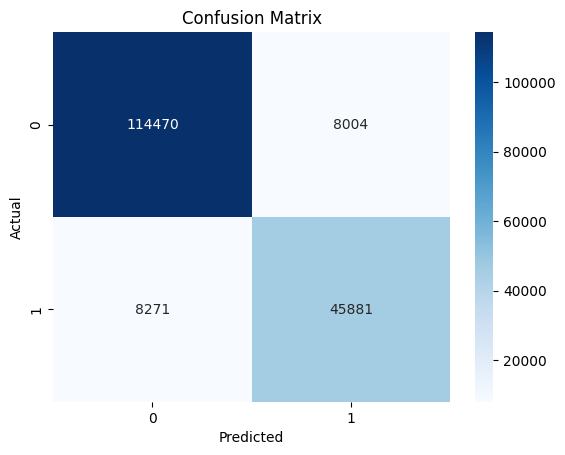

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Observation:

Diagonal elements (TP and TN): These represent the number of correct predictions. So, it is indicating better model performance.

In [ ]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy ({model_name}): {accuracy}\n")

    # Classification Report
    print(f"Classification Report ({model_name}):")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix ({model_name})")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Accuracy (Lasso Regression): 0.9078051928934585

Classification Report (Lasso Regression):
              precision    recall  f1-score   support

           0       0.93      0.93      0.93    122474
           1       0.85      0.85      0.85     54152

    accuracy                           0.91    176626
   macro avg       0.89      0.89      0.89    176626
weighted avg       0.91      0.91      0.91    176626



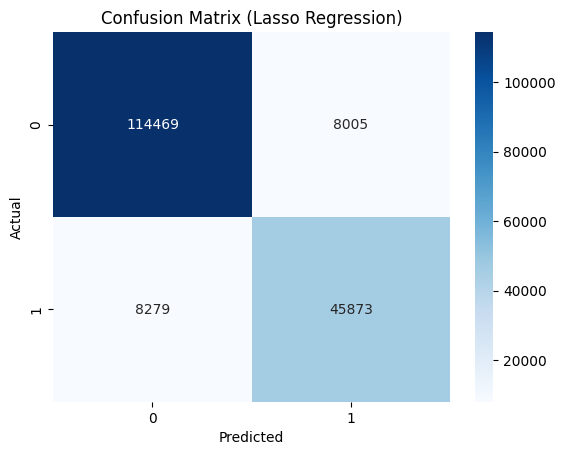

In [ ]:
# Lasso Logistic Regression
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
evaluate_model(lasso_model, X_train, X_test, y_train, y_test, "Lasso Regression")

Accuracy (Ridge Regression): 0.8993126719735486

Classification Report (Ridge Regression):
              precision    recall  f1-score   support

           0       0.94      0.91      0.93    122474
           1       0.82      0.87      0.84     54152

    accuracy                           0.90    176626
   macro avg       0.88      0.89      0.88    176626
weighted avg       0.90      0.90      0.90    176626



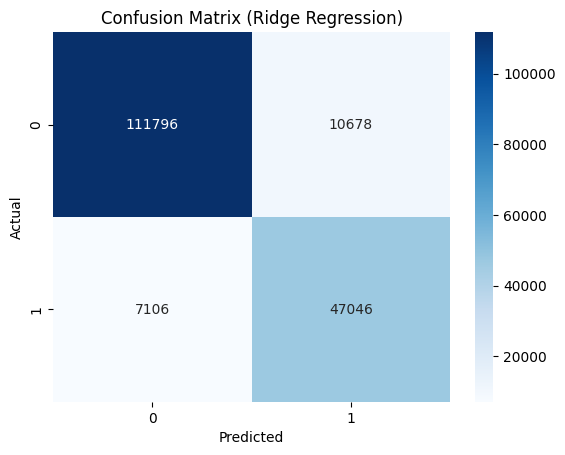

In [ ]:
# Ridge Regression
ridge_model = RidgeClassifier(alpha=0.5)
evaluate_model(ridge_model, X_train, X_test, y_train, y_test, "Ridge Regression")

Accuracy (Decision Tree): 1.0

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122474
           1       1.00      1.00      1.00     54152

    accuracy                           1.00    176626
   macro avg       1.00      1.00      1.00    176626
weighted avg       1.00      1.00      1.00    176626



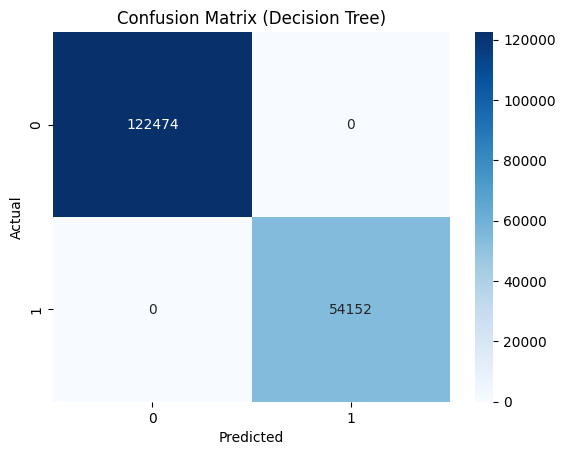

In [ ]:
# Decision Tree
decision_tree_model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=10, random_state=42)
evaluate_model(decision_tree_model, X_train, X_test, y_train, y_test, "Decision Tree")


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(decision_tree_model, X_train, y_train, cv=5)
print(f"Cross-Validation Accuracy: {scores.mean():.2f}")

Cross-Validation Accuracy: 1.00


Accuracy (XGBoost): 0.9977919445608234

Classification Report (XGBoost):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    122474
           1       1.00      1.00      1.00     54152

    accuracy                           1.00    176626
   macro avg       1.00      1.00      1.00    176626
weighted avg       1.00      1.00      1.00    176626



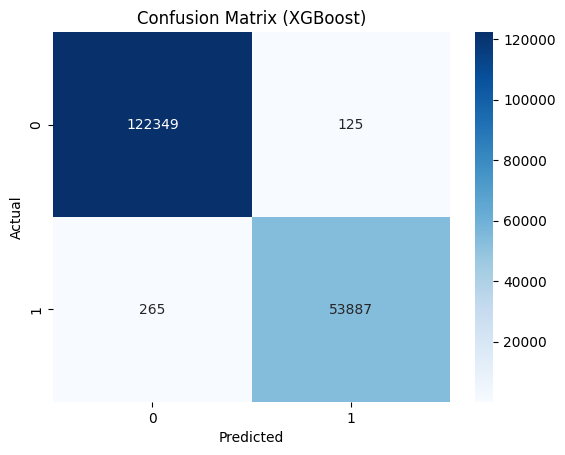

In [ ]:
# # XGBoost
# xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
# evaluate_model(xgb_model, X_train, X_test, y_train, y_test, "XGBoost")

# 5. Model Performance



In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for logistic regression
param_grid = {'C': [0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print(f"Best Parameters using hyperparameter (Logistic Regression): {grid.best_params_}")
print(f"Best Cross-Validated Accuracy: {grid.best_score_}")

# Apply the best model
best_log_model = grid.best_estimator_


Best Parameters using hyperparameter (Logistic Regression): {'C': 100}
Best Cross-Validated Accuracy: 0.9082890081115732


Importance:

Optimized Performance: Ensures the logistic regression model is neither underfitting nor overfitting.

Cross-Validation: Provides a more reliable performance estimate compared to a single train-test split.

Regularization Impact: Proper tuning of C balances bias and variance.

ROC-AUC Score (Logistic Regression): 0.8909553063493968


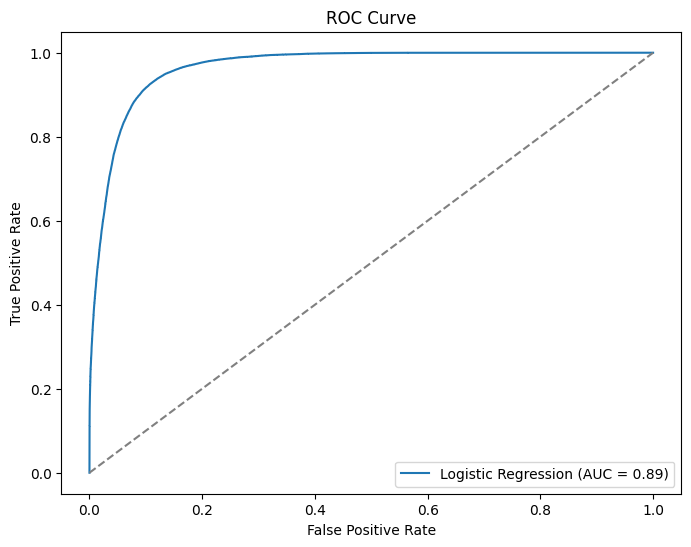

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC Score (Logistic Regression): {roc_auc}")

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

Observation:

This model has an 89.09% chance of distinguishing between a feasible and non-feasible district.

The diagonal line
𝑦
=
𝑥
y=x (plotted using plt.plot([0, 1], [0, 1], linestyle="--", color="gray")) represents the performance of a random classifier.


In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for logistic regression
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring="accuracy")
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")

Cross-Validation Accuracy Scores: [0.90866011 0.91160418 0.90603309 0.91539137 0.8926879 ]
Mean CV Accuracy: 0.906875327617977


Observation:

The mean accuracy of 90.69% indicates the logistic regression model is effective for predicting fog harvesting feasibility based on the given dataset.

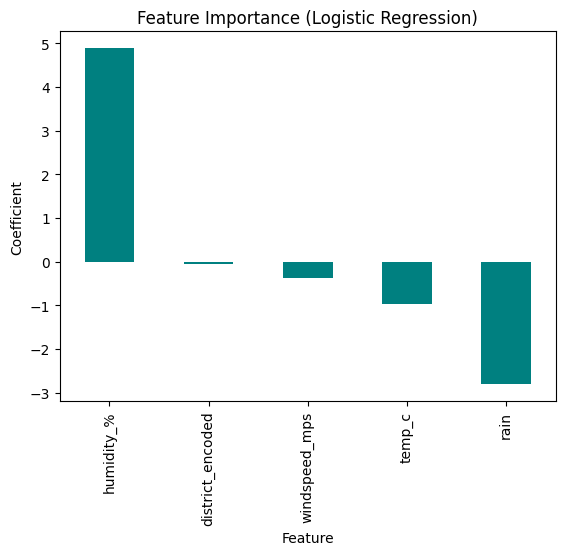

In [ ]:
# Logistic regression coefficients
coefficients = pd.DataFrame({
    'Feature': ['district_encoded', 'rain', 'humidity_%', 'temp_c', 'windspeed_mps'],
    'Coefficient': model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Plot feature importance
coefficients.plot(kind="bar", x="Feature", y="Coefficient", legend=False, color="teal")
plt.title("Feature Importance (Logistic Regression)")
plt.ylabel("Coefficient")
plt.show()


In [ ]:
# Logistic regression coefficients
coefficients = pd.DataFrame({
    'Feature': ['district_encoded', 'rain', 'humidity_%', 'temp_c', 'windspeed_mps'],
    'Coefficient': model.coef_[0]
})
print("\nLogistic Regression Coefficients:")
print(coefficients)


Logistic Regression Coefficients:
            Feature  Coefficient
0  district_encoded    -0.047640
1              rain    -2.807312
2        humidity_%     4.887369
3            temp_c    -0.966836
4     windspeed_mps    -0.375953


Observation:

Humidity, with higher value of positive coefficient increases the feasibility whereas other features with higher negative coefficient decreases feasibility.

In [ ]:
tn, fp, fn, tp = conf_matrix.ravel()

# Detailed metrics
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")

# Calculate specific metrics
precision = tp / (tp + fp)
recall = tp / (tp + fn)
specificity = tn / (tn + fp)

print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"Specificity: {specificity:.2f}")


True Positives (TP): 45881
True Negatives (TN): 114470
False Positives (FP): 8004
False Negatives (FN): 8271
Precision: 0.85
Recall (Sensitivity): 0.85
Specificity: 0.93


In [ ]:
# Export feasibility predictions
df['feasibility_prediction'] = model.predict(scaler.transform(X))
df.to_csv('fog_harvesting_predictions.csv', index=False)
print("Fog harvesting feasibility predictions saved to 'fog_harvesting_predictions.csv'.")

Fog harvesting feasibility predictions saved to 'fog_harvesting_predictions.csv'.


Index(['DISTRICT', 'HQ', 'PROVINCE', 'geometry'], dtype='object')


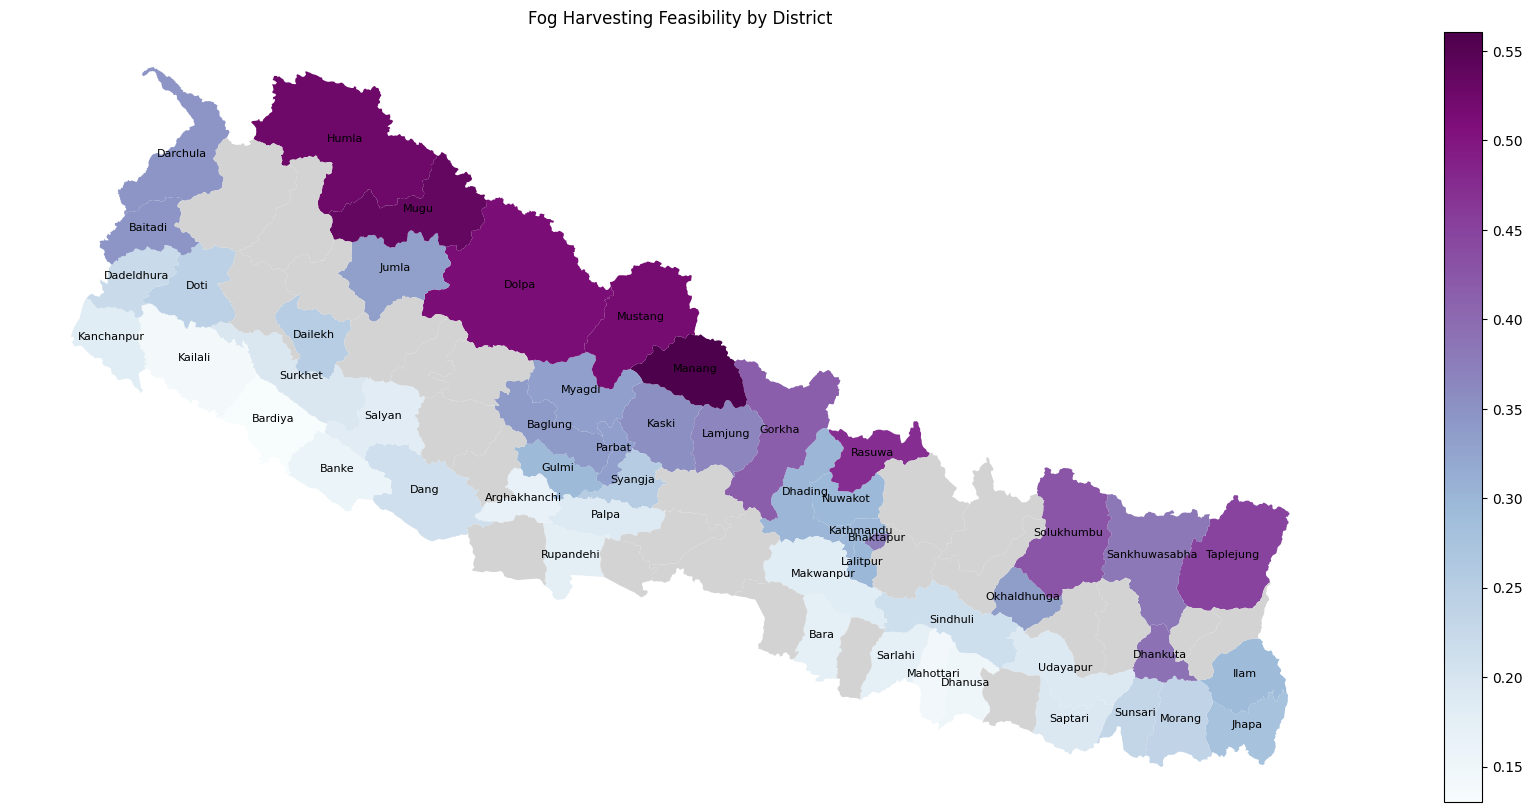

In [ ]:
# Visualization: Map the feasibility
# Load district boundaries (replace with your GeoJSON file)
district_geo = gpd.read_file('/content/drive/MyDrive/CW_Datasets/nepal-with-districts-acesmndr.geojson')

# Check the actual column names in the GeoDataFrame
print(district_geo.columns)

district_geo['district'] = district_geo['DISTRICT'].str.lower()  # Match names to dataset

# Merge predictions with district boundaries
merged_data = district_geo.merge(df.groupby('district')['feasibility_prediction'].mean().reset_index(), on='district', how='left')

# Plot feasibility map with missing data highlighted
fig, ax = plt.subplots(1, 1, figsize=(24, 10))
merged_data.plot(
    column='feasibility_prediction',
    cmap='BuPu',
    legend=True,
    missing_kwds={
        "color": "lightgrey",  # Color for missing data
    },
    ax=ax
)

# Add labels for each district
for idx, row in merged_data.iterrows():
    if not pd.isna(row['feasibility_prediction']):
        plt.text(
            row.geometry.centroid.x,
            row.geometry.centroid.y,
            f"{row['district'].capitalize()}",
            fontsize=8,
            ha='center',
            color='black'
        )

# Add title and remove axes
plt.title("Fog Harvesting Feasibility by District")
plt.axis('off')

# Show the map
plt.show()

Observation:

The map uses a color gradient, where lighter colors indicate lower feasibility and darker colors indicate higher feasibility.

Note: Districts without predictions are filled with a light grey color.

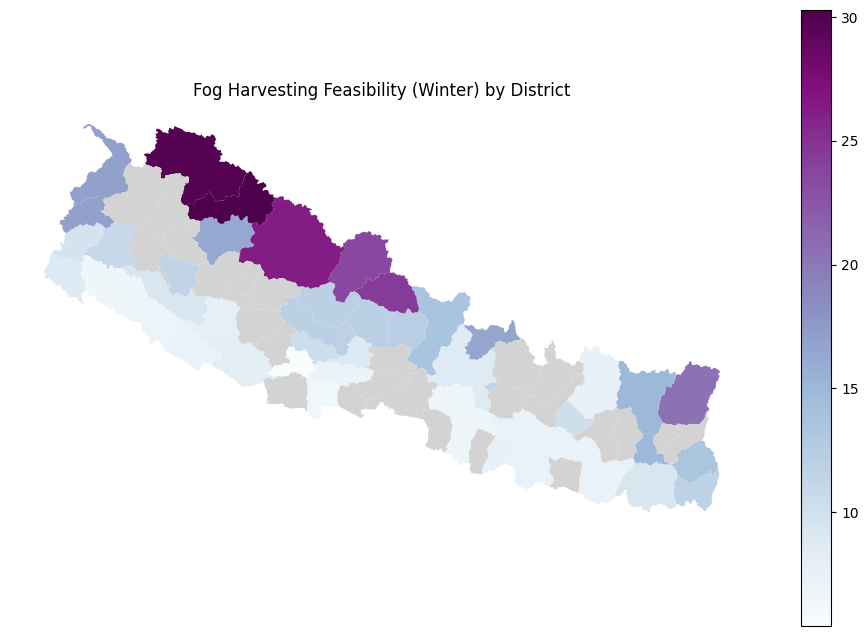

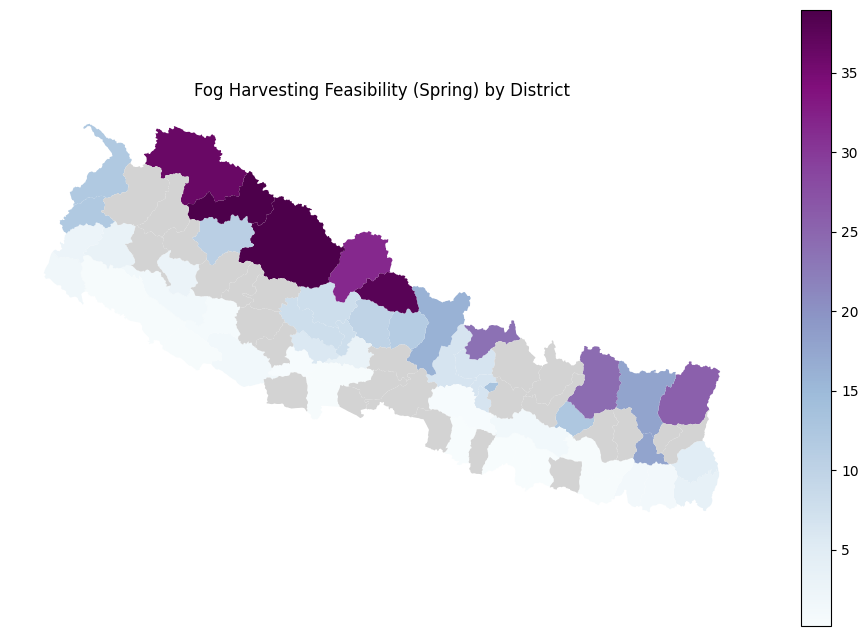

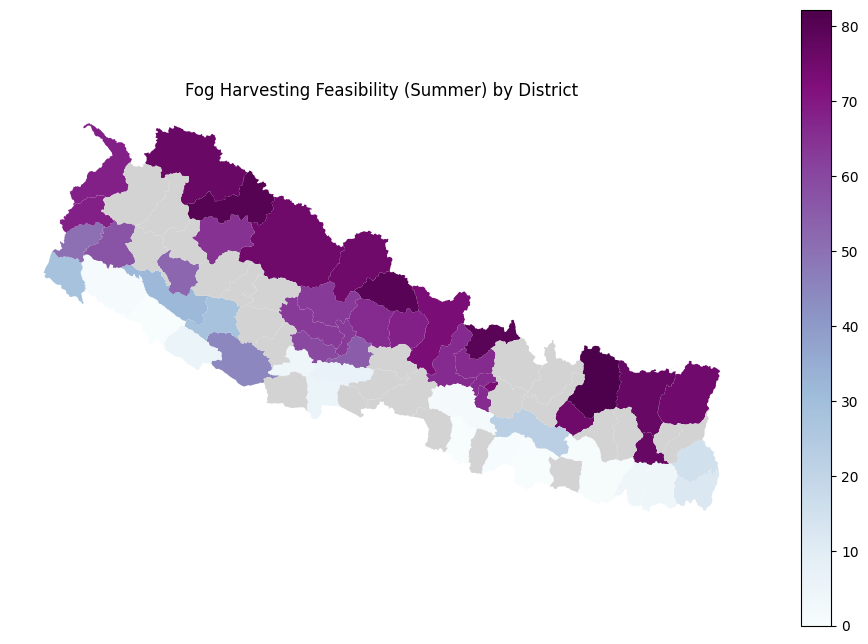

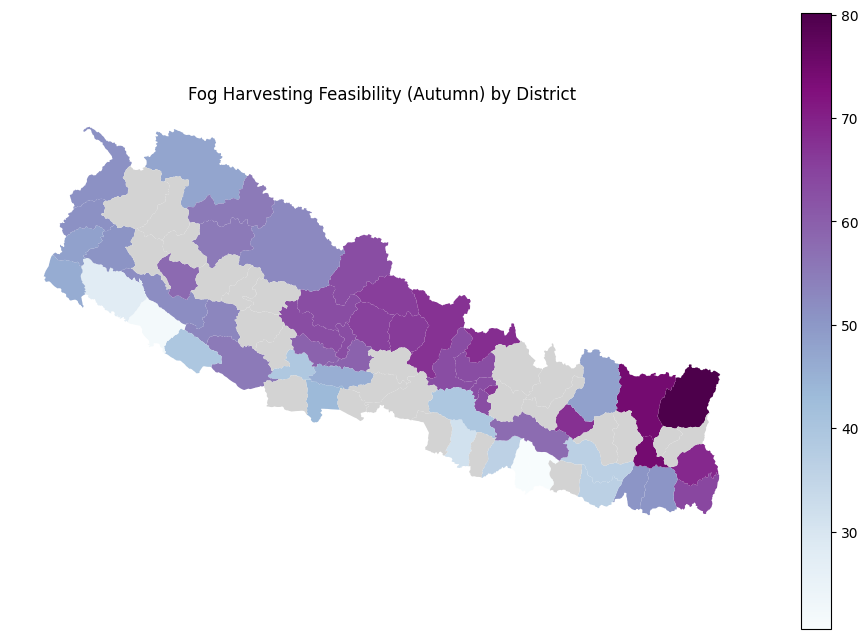

In [ ]:
# Add a season column based on the date
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

# Define seasons in Nepal
def get_season(month):
    if month in [12, 1, 2]:  # Winter
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer
        return 'Summer'
    elif month in [9, 10, 11]:  # Autumn
        return 'Autumn'

df['season'] = df['month'].apply(get_season)

# Calculate feasibility percentage per district and season
seasonal_feasibility = (
    df.groupby(['district', 'season'])['feasible']
    .mean()
    .reset_index()
    .rename(columns={'feasible': 'feasibility_percentage'})
)
seasonal_feasibility['feasibility_percentage'] *= 100  # Convert to percentage

# Merge with district boundaries (replace with your GeoJSON file)
district_geo = gpd.read_file('/content/drive/MyDrive/CW_Datasets/nepal-with-districts-acesmndr.geojson')
district_geo['district'] = district_geo['DISTRICT'].str.lower()

# Loop through seasons to plot feasibility maps
seasons = ['Winter', 'Spring', 'Summer', 'Autumn']

for season in seasons:
    # Filter data for the current season
    season_data = seasonal_feasibility[seasonal_feasibility['season'] == season]
    merged_season_data = district_geo.merge(season_data, on='district', how='left')

    # Plot feasibility map for the current season
    ax = merged_season_data.plot(
        column='feasibility_percentage',
        cmap='BuPu',
        legend=True,
        figsize=(12, 8),
        missing_kwds={"color": "lightgrey"},
    )
    plt.title(f"Fog Harvesting Feasibility ({season}) by District")
    plt.axis('off')
    plt.show()

Observation:

Winter: Western Himalayan Region with exception of Taplejung is feasible for fog harvesting as winter brings humidity to these regions.

Spring: Almost similar to the winter scenario.

Summer: Except Terai region, whole Nepal from Chure Range is feasible for fog harvesting.

Autumn: Eastern region and Central region from hill range is feasible for fog harvesting.

In [ ]:
# Models Accuracy Summary
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, model.predict(X_test)),
    "Ridge Classifier": accuracy_score(y_test, ridge_model.predict(X_test)),
    "Lasso Logistic Regression": accuracy_score(y_test, lasso_model.predict(X_test)),
    "Decision Tree": accuracy_score(y_test, decision_tree_model.predict(X_test)),
    "XGBoost": accuracy_score(y_test, xgb_model.predict(X_test))
}

# Print Summary
print("\nBenchmarking Summary: Model Accuracies")
for model_name, acc in model_accuracies.items():
    print(f"{model_name}: {acc}")

# Final Conclusion
print("\nFinal Conclusion:")
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"The best-performing model is {best_model} with an accuracy of {model_accuracies[best_model]:.2f}.\n")
print("Districts with high humidity, low wind speed, moderate temperatures, and low rainfall are suitable for fog harvesting.")



Benchmarking Summary: Model Accuracies
Logistic Regression: 0.907856148018978
Ridge Classifier: 0.8993126719735486
Lasso Logistic Regression: 0.9078051928934585
Decision Tree: 1.0
XGBoost: 0.9977919445608234

Final Conclusion:
The best-performing model is Decision Tree with an accuracy of 1.00.

Districts with high humidity, low wind speed, moderate temperatures, and low rainfall are suitable for fog harvesting.


**Model Performance:**

***Objective:***

Compare different machine learning models to identify the best-performing one for classifying districts as feasible for fog harvesting based on environmental conditions.

***Models Evaluated:***

**Logistic Regression:** A standard model for binary classification that predicts probabilities based on a linear relationship between the features and the log-odds of the target.

**Ridge Classifier:** A regularized version of logistic regression that penalizes large coefficients to prevent overfitting.

**Lasso Logistic Regression:** Another regularized version, but it uses L1 regularization to encourage sparsity (i.e., some coefficients may be reduced to zero).

**Decision Tree:** A tree-based model that splits data based on feature thresholds, highly flexible and interpretable.
XGBoost: An advanced tree-based ensemble learning model known for its efficiency and accuracy.

***Final Conclusion***

**Best Model:**

The Decision Tree achieved 100% accuracy, making it the best performer among the evaluated models.
Interpretation: The Decision Tree perfectly classified all test samples into feasible or non-feasible districts. However, this could indicate potential overfitting, especially if the dataset is small or has noise.
XGBoost: Slightly less accurate than the Decision Tree but still performed exceptionally well (99.78% accuracy). It is often preferred for its generalization ability.



**Districts Suitable for Fog Harvesting:**

Districts with high humidity (>60%), low wind speed (<5 m/s), moderate temperature (<25°C), and low rainfall (<10 mm) are identified as suitable.
These criteria align with scientific principles for fog-harvesting feasibility.

**Recommendations:**
Use XGBoost for predictions in practical applications due to its robustness and regularization.
Further validate model performance on unseen or external datasets to confirm generalization.






# 6. Assumptions Check

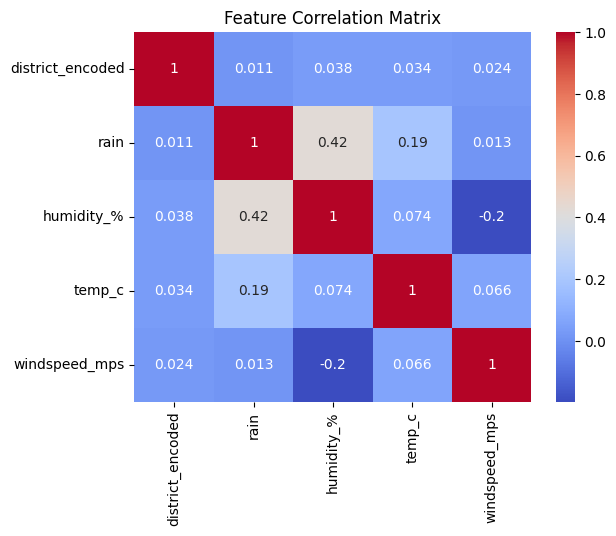

In [ ]:
# Multicollinearity
correlation_matrix = pd.DataFrame(X_scaled, columns=['district_encoded', 'rain', 'humidity_%', 'temp_c', 'windspeed_mps']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()


Observation:

None of the attributes are correlated, so these can be used together in the model.

In [ ]:
# Calculate VIF for each feature
X_vif = df[['district_encoded', 'rain', 'humidity_%', 'temp_c', 'windspeed_mps']]
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
            Feature       VIF
0  district_encoded  3.636874
1              rain  1.375875
2        humidity_%  5.532153
3            temp_c  3.864090
4     windspeed_mps  6.136218


The VIF is around or less than 5, which shows moderate to low multicollinearity in dataset, with execption of windspeed, which is again managable as it is not highly correlated to other attributes.

In [ ]:
# Data Size Check
n_obs = df.shape[0]
n_predictors = X.shape[1]
min_required = 10 * n_predictors * 2

print(f"Number of observations: {n_obs}")
print(f"Minimum required observations: {min_required}")

if n_obs >= min_required:
    print("Sample size is sufficient.")
else:
    print("Sample size is insufficient. Consider collecting more data.")


Number of observations: 883128
Minimum required observations: 100
Sample size is sufficient.


# 7. Conclusion

In [ ]:
# These are trained models above
models = {
    'logistic_regression': model,
    'ridge_classifier': ridge_model,
    'lasso_logistic_regression': lasso_model,
    'decision_tree': decision_tree_model,
    'xgboost': xgb_model
}

# Save each model to a file
for model_name, model in models.items():
    filename = f"{model_name}.joblib"
    dump(model, filename)
    print(f"Model {model_name} saved as {filename}.")

Model logistic_regression saved as logistic_regression.joblib.
Model ridge_classifier saved as ridge_classifier.joblib.
Model lasso_logistic_regression saved as lasso_logistic_regression.joblib.
Model decision_tree saved as decision_tree.joblib.
Model xgboost saved as xgboost.joblib.


In [ ]:
# Define districts
districts = ['arghakhanchi', 'baglung', 'baitadi', 'bajang', 'banke', 'bara', 'bardiya',
             'bhaktapur', 'chitawan', 'dadeldhura', 'dailekh', 'dang', 'darchula', 'dhading',
             'dhankuta', 'dhanusa', 'dolkha', 'dolpa', 'doti', 'gorkha', 'gulmi', 'humla',
             'ilam', 'jhapa', 'jumla', 'kabhre', 'kailali', 'kanchanpur', 'kaski',
             'kathmandu', 'lalitpur', 'lamjung', 'mahottari', 'makwanpur', 'manang',
             'morang', 'mugu', 'mustang', 'myagdi', 'nawalparasi', 'nuwakot', 'okhaldhunga',
             'palpa', 'panchther', 'parbat', 'rasuwa', 'routahat', 'rukum', 'rupandehi',
             'salyan', 'sankhuwasabha', 'saptari', 'sarlahi', 'sindhuli', 'solukhumbu',
             'sunsari', 'surkhet', 'syangja', 'tanahun', 'taplejung', 'terhathum',
             'udayapur']

# Define date range for all districts
start_date = datetime(2020, 1, 1)
end_date = datetime(2025, 1, 1)
date_range = pd.date_range(start_date, end_date)

rows_per_day_per_district = 1

# Generate dataset
rows = []
for district in districts:
    for date in date_range:
        for _ in range(rows_per_day_per_district):
            rain = np.random.uniform(0, 10)  # Random rainfall (0-10 mm)
            humidity = np.random.uniform(20, 100)  # Random humidity (20-100%)
            temp = np.random.uniform(0, 45)  # Random temperature (0-45°C)
            windspeed = np.random.uniform(0, 25)  # Random windspeed (0-15 m/s)

            # Calculate feasibility
            feasible = 1 if (humidity > 60 and temp < 25 and windspeed < 5 and rain < 10) else 0

            rows.append([date, district, rain, humidity, temp, windspeed, feasible])

# Create DataFrame
df_synthetic = pd.DataFrame(rows, columns=['date', 'district', 'rain', 'humidity_%', 'temp_c', 'windspeed_mps', 'feasible'])


# Encode the 'district' column
le = LabelEncoder()
df_synthetic['district_encoded'] = le.fit_transform(df_synthetic['district'])


Purpose:
Synthetic dataset is produced in order to test the model above furthermore.

In [ ]:
# Save to CSV
df_synthetic.to_csv("synthetic_fog_harvesting_data.csv", index=False)

In [ ]:
df_synthetic.shape

(113336, 8)

In [ ]:
df_synthetic

,date,district,rain,humidity_%,temp_c,windspeed_mps,feasible,district_encoded
0,2020-01-01,arghakhanchi,5.560326,49.244936,2.626367,23.470485,0,0
1,2020-01-02,arghakhanchi,8.779613,45.924747,15.394896,19.253341,0,0
2,2020-01-03,arghakhanchi,8.278457,77.184856,33.927650,4.214781,0,0
3,2020-01-04,arghakhanchi,3.735156,80.715659,14.290773,19.531850,0,0
4,2020-01-05,arghakhanchi,6.364192,40.724132,0.233108,2.531628,0,0
...,...,...,...,...,...,...,...,...
113331,2024-12-28,udayapur,1.003268,56.326185,25.103744,18.856903,0,61
113332,2024-12-29,udayapur,0.223337,84.820684,20.570033,20.705902,0,61
113333,2024-12-30,udayapur,2.863523,42.859002,14.870450,21.143788,0,61
113334,2024-12-31,udayapur,1.832713,87.758574,23.277784,22.254380,0,61


Feasibility predictions saved for logistic_regression.

Performance Metrics for Logistic_Regression:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96    107014
           1       0.44      0.65      0.53      6322

    accuracy                           0.93    113336
   macro avg       0.71      0.80      0.75    113336
weighted avg       0.95      0.93      0.94    113336

Confusion Matrix:
[[101794   5220]
 [  2197   4125]]


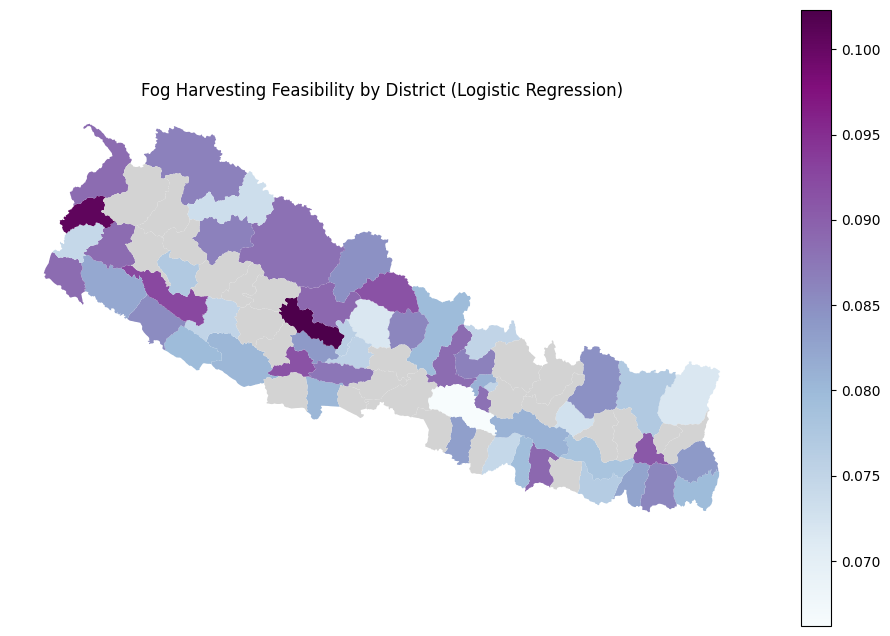

Feasibility predictions saved for ridge_classifier.

Performance Metrics for Ridge_Classifier:
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.73      0.84    107014
           1       0.14      0.72      0.23      6322

    accuracy                           0.73    113336
   macro avg       0.56      0.73      0.53    113336
weighted avg       0.93      0.73      0.80    113336

Confusion Matrix:
[[78467 28547]
 [ 1779  4543]]


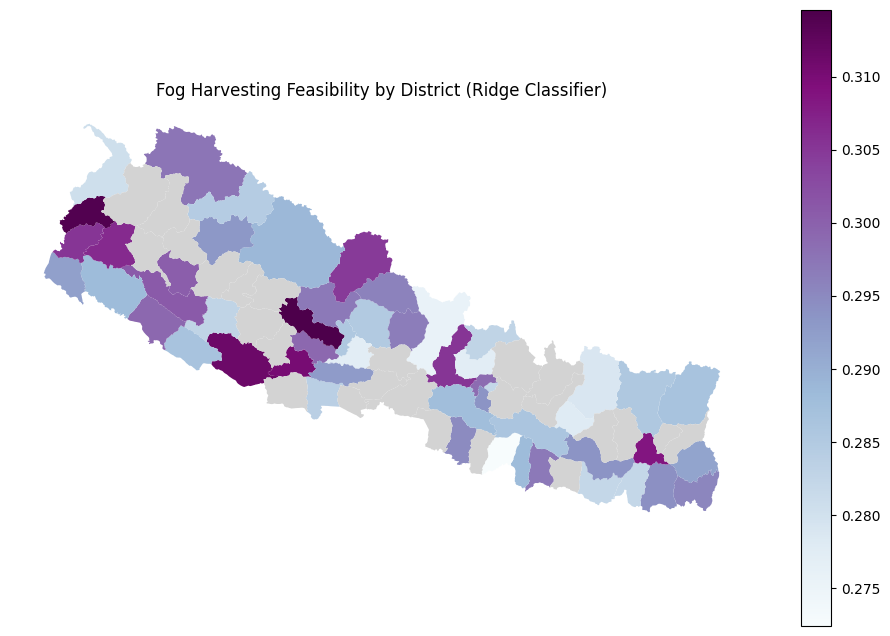

Feasibility predictions saved for lasso_logistic_regression.

Performance Metrics for Lasso_Logistic_Regression:
Accuracy: 0.93
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96    107014
           1       0.44      0.65      0.53      6322

    accuracy                           0.93    113336
   macro avg       0.71      0.80      0.75    113336
weighted avg       0.95      0.93      0.94    113336

Confusion Matrix:
[[101803   5211]
 [  2197   4125]]


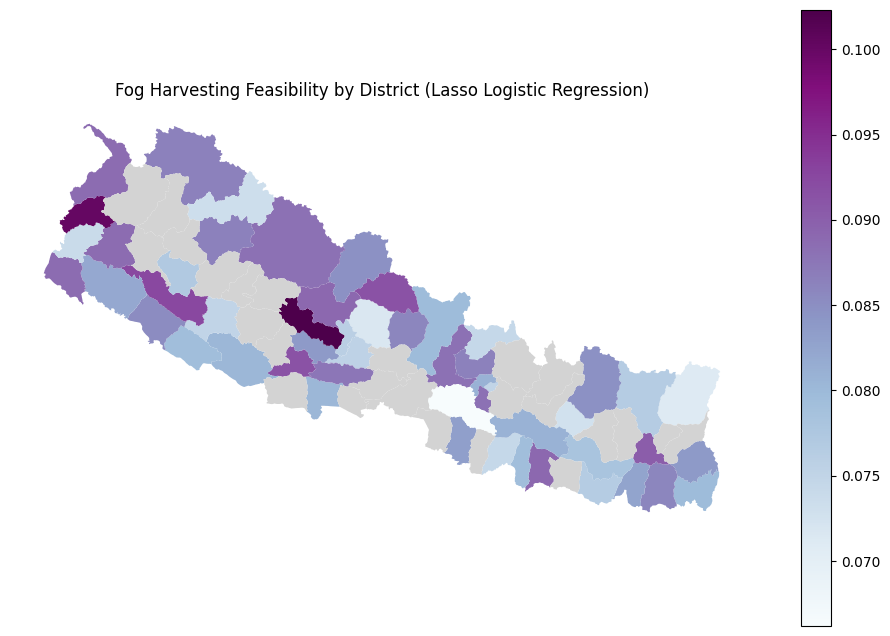

Feasibility predictions saved for decision_tree.

Performance Metrics for Decision_Tree:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107014
           1       1.00      1.00      1.00      6322

    accuracy                           1.00    113336
   macro avg       1.00      1.00      1.00    113336
weighted avg       1.00      1.00      1.00    113336

Confusion Matrix:
[[107014      0]
 [    12   6310]]


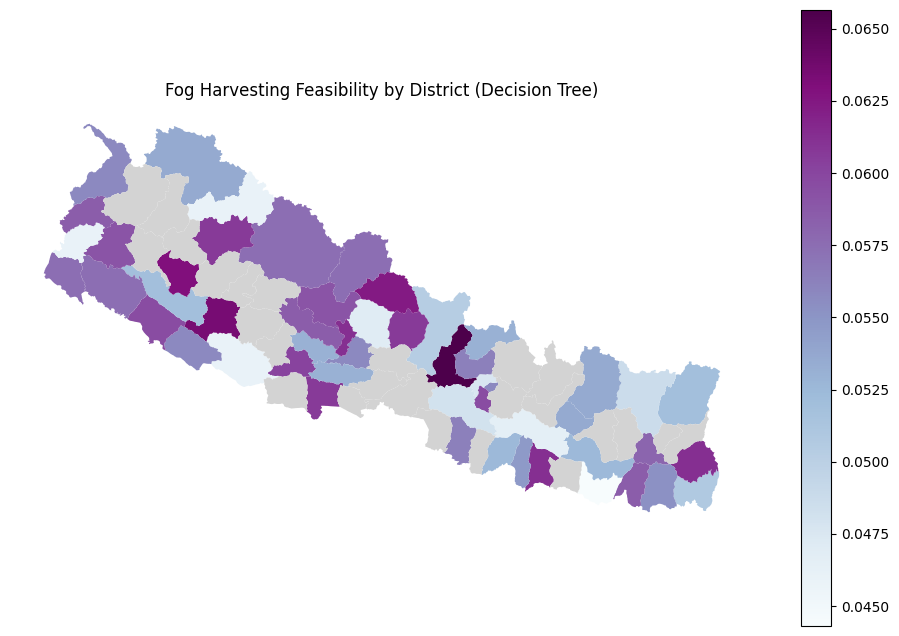

Feasibility predictions saved for xgboost.

Performance Metrics for Xgboost:
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107014
           1       0.99      0.98      0.98      6322

    accuracy                           1.00    113336
   macro avg       0.99      0.99      0.99    113336
weighted avg       1.00      1.00      1.00    113336

Confusion Matrix:
[[106942     72]
 [   150   6172]]


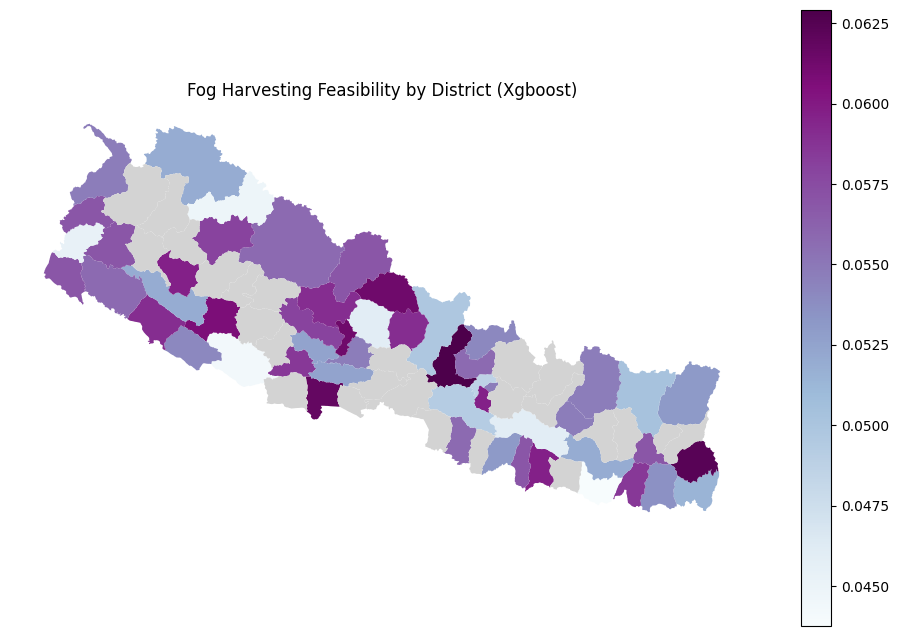

Performance metrics for all models saved to 'model_performance_metrics.json'.


In [ ]:
# Load the new dataset
new_data = pd.read_csv('/content/synthetic_fog_harvesting_data.csv')

# Select features for prediction
X_new = new_data[['district_encoded', 'rain', 'humidity_%', 'temp_c', 'windspeed_mps']]
y_true = new_data['feasible']  # True labels for feasibility

# Scale the features using the scaler fitted on the original dataset
X_new_scaled = scaler.transform(X_new)

# Load district GeoJSON data
district_geo = gpd.read_file('/content/drive/MyDrive/CW_Datasets/nepal-with-districts-acesmndr.geojson')
district_geo['district'] = district_geo['DISTRICT'].str.lower()  # Match names to dataset

# Initialize a dictionary to store metrics
performance_metrics = {}

# Visualization and Performance Evaluation for Each Model
for model_name, model in models.items():
    # Predict feasibility
    y_pred = model.predict(X_new_scaled)
    new_data[f'feasibility_{model_name}'] = y_pred

    # Save predictions to CSV
    new_data.to_csv(f'fog_harvesting_predictions_{model_name}.csv', index=False)
    print(f"Feasibility predictions saved for {model_name}.")

    # Calculate performance metrics
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(y_true, y_pred, output_dict=True)
    matrix = confusion_matrix(y_true, y_pred)

    # Store metrics for the current model
    performance_metrics[model_name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'confusion_matrix': matrix
    }

    # Print metrics
    print(f"\nPerformance Metrics for {model_name.title()}:")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(classification_report(y_true, y_pred))
    print("Confusion Matrix:")
    print(matrix)

    # Merge predictions with district GeoJSON
    model_predictions = new_data.groupby('district')[f'feasibility_{model_name}'].mean().reset_index()
    merged_geo = district_geo.merge(model_predictions, on='district', how='left')

    # Plot feasibility map for the current model
    ax = merged_geo.plot(
        column=f'feasibility_{model_name}',
        cmap='BuPu',
        legend=True,
        figsize=(12, 8),
        missing_kwds={"color": "lightgrey", "label": "No Data"},
    )
    plt.title(f"Fog Harvesting Feasibility by District ({model_name.replace('_', ' ').title()})")
    plt.axis('off')
    plt.show()

import json

# Convert numpy arrays (e.g., confusion_matrix) to lists for JSON serialization
for model_name, metrics in performance_metrics.items():
    # Convert confusion_matrix (numpy array) to a list
    metrics['confusion_matrix'] = metrics['confusion_matrix'].tolist()

# Save the metrics to a JSON file
with open('model_performance_metrics.json', 'w') as f:
    json.dump(performance_metrics, f, indent=4)

print("Performance metrics for all models saved to 'model_performance_metrics.json'.")


Final Thoughts:
Best Performing Models:

Decision Tree and XGBoost both have near-perfect performance with extremely high accuracy, precision, recall, and F1-scores. These models are highly reliable for classifying fog harvesting feasibility. This also raises the overfitting problem.


Logistic Regression and Lasso Logistic Regression:
These models perform similarly with good accuracy (~93.5%) and reasonable metrics for both classes, though they have a weaker performance for class 1 (fog harvesting feasible). But, this is due to dataset itself as it is synthetic.

Ridge Classifier:

This model performs poorly for class 1, with low precision and F1-score. It may not be suitable for this task unless further improvements are made.
